In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(r"E:\github\data science\data-science\Machine Learning\bank-additional-full.csv", sep=';')

df['y'] = df['y'].map({'no': 0, 'yes': 1})
df['default'] = df['default'].map({'no': 0, 'yes': 1, 'unknown': -1})
df['housing'] = df['housing'].map({'no': 0, 'yes': 1, 'unknown': -1})
df['loan'] = df['loan'].map({'no': 0, 'yes': 1, 'unknown': -1})

categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
binary_cols = ['default', 'housing', 'loan']

features = numerical_cols + categorical_cols + binary_cols

X_class = df[features]
y_class = df['y']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

X_reg = df[features]
y_reg = df['duration']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols + binary_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

logistic_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

svr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

logistic_model.fit(X_train_c, y_train_c)
svr_model.fit(X_train_r, y_train_r)

y_pred_c = logistic_model.predict(X_test_c)
y_pred_r = svr_model.predict(X_test_r)

print("Logistic Regression Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("SVR Mean Squared Error:", mean_squared_error(y_test_r, y_pred_r))


Logistic Regression Accuracy: 0.8973051711580481
SVR Mean Squared Error: 72792.51644871243


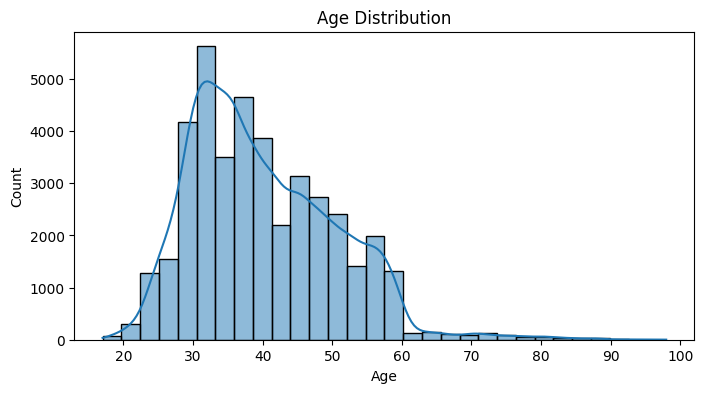

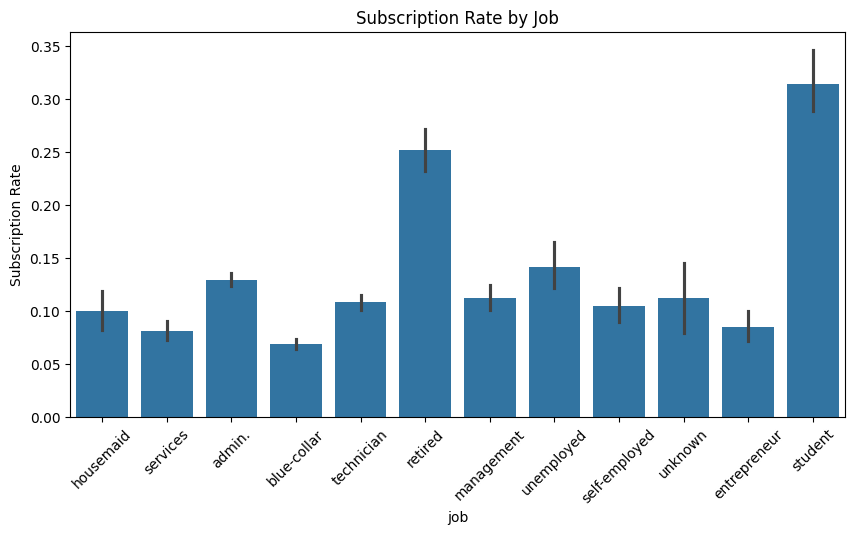

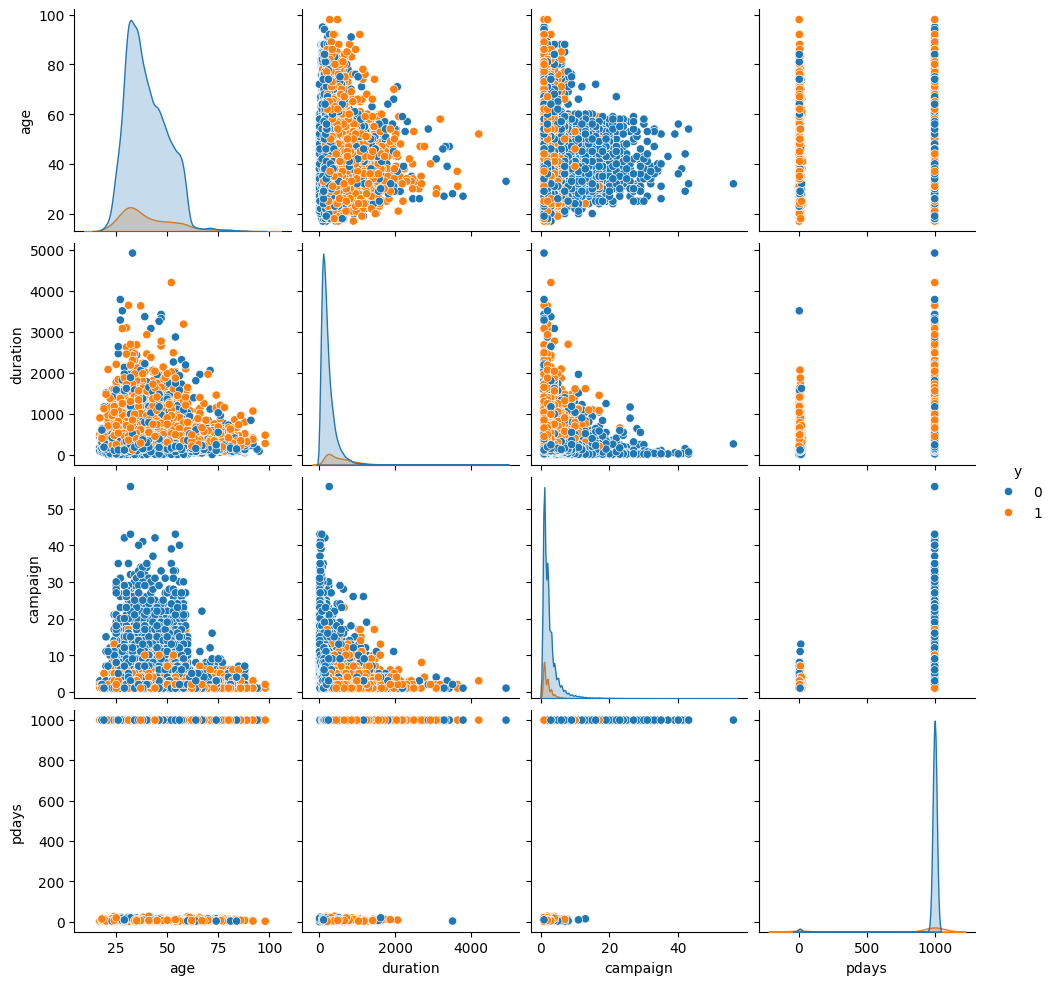

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='job', y='y', estimator='mean')
plt.title("Subscription Rate by Job")
plt.xticks(rotation=45)
plt.ylabel("Subscription Rate")
plt.show()

sns.pairplot(df[['age', 'duration', 'campaign', 'pdays', 'y']], hue='y')
plt.show()
